In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [3]:
# Download data into Pandas dataframe
def hist_data(tickers):
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 10, 27), end=datetime(2021, 10, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns=names
    return data

tickers = ["AAPL", "GOOG", "AMD", "SPY", "MSFT"]
d = hist_data(tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Display last few rows
d.tail()

,AAPL,GOOG,AMD,SPY,MSFT
Date,,,,,
2021-10-20,147.358795,142.414993,116.389999,436.987396,301.328247
2021-10-21,147.576019,142.780502,119.330002,438.127167,304.611969
2021-10-22,146.796082,138.625000,119.820000,437.673157,303.043640
2021-10-25,146.746689,138.772995,122.360001,440.020386,302.034027
2021-10-26,147.418045,139.671997,122.930000,440.416382,303.974823


In [5]:
# Find correlations between assets
corr = d.corr()
corr

,AAPL,GOOG,AMD,SPY,MSFT
AAPL,1.000000,0.817185,0.788684,0.832325,0.886737
GOOG,0.817185,1.000000,0.572945,0.978253,0.974893
AMD,0.788684,0.572945,1.000000,0.555607,0.681377
SPY,0.832325,0.978253,0.555607,1.000000,0.955292
MSFT,0.886737,0.974893,0.681377,0.955292,1.000000


<Axes: >

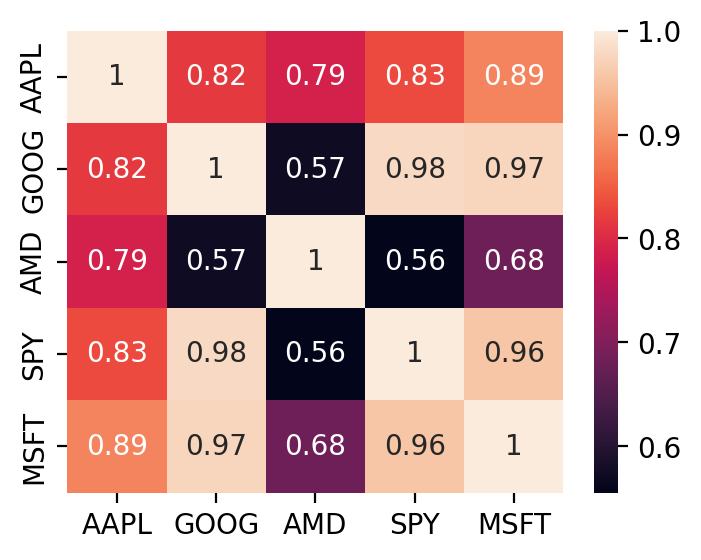

In [9]:
# Create heatmap 
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(4,3), dpi=200)
sn.heatmap(corr, annot=True)

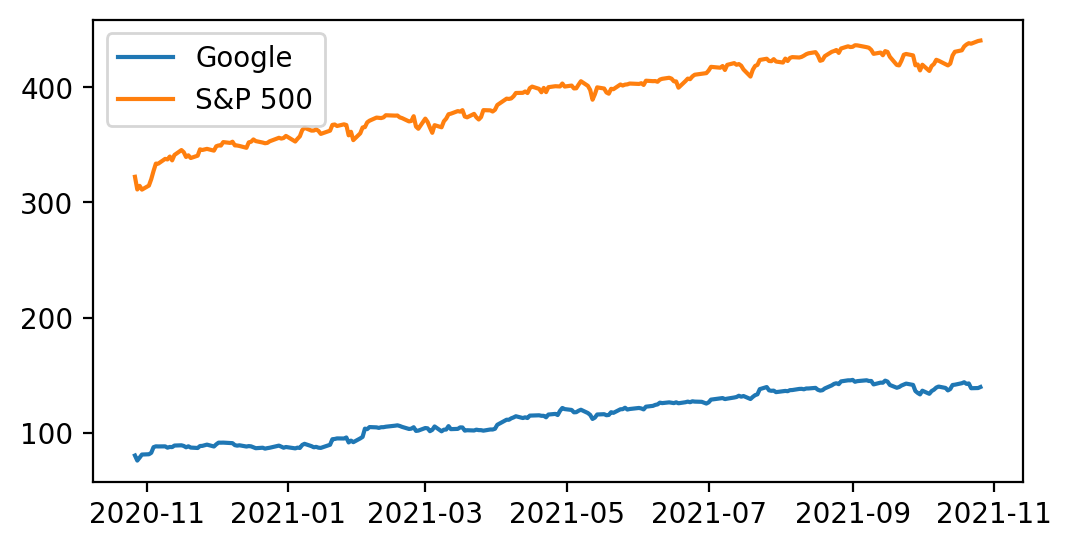

In [12]:
# Plot data between Google/SPY
import matplotlib.pyplot as plt
figure(figsize=(6,3), dpi=200)
google = d['GOOG']
spy = d['SPY']
plt.plot(google, label='Google')
plt.plot(spy, label='S&P 500')
plt.legend()

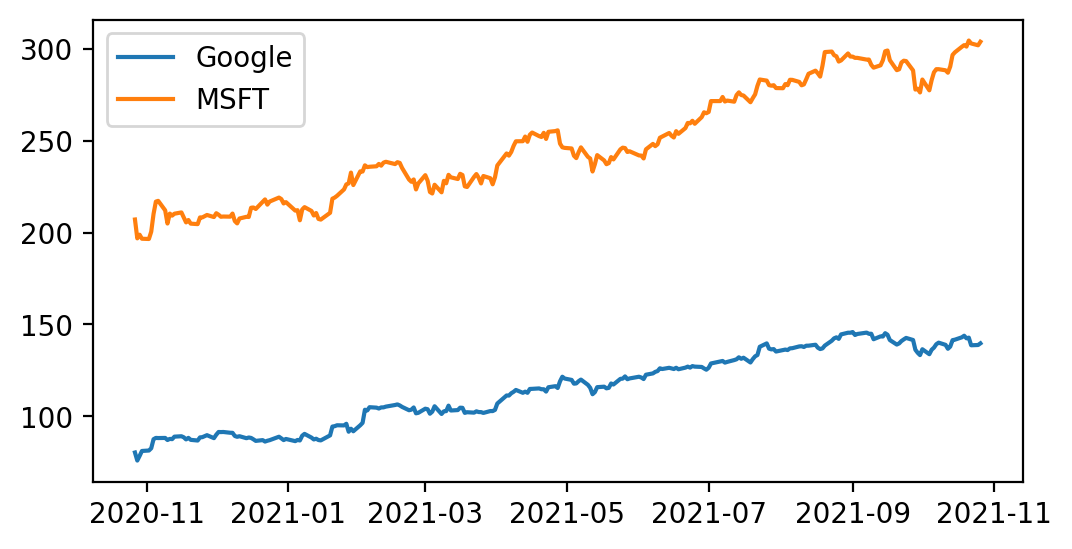

In [22]:
# Plot data between Microsoft/Google
import matplotlib.pyplot as plt
figure(figsize=(6,3), dpi=200)
google = d['GOOG']
MSFT = d['MSFT']
plt.plot(google, label='Google')
plt.plot(MSFT, label='MSFT')
plt.legend()

Text(0.5, 1.0, 'Spread between Google and MSFT')

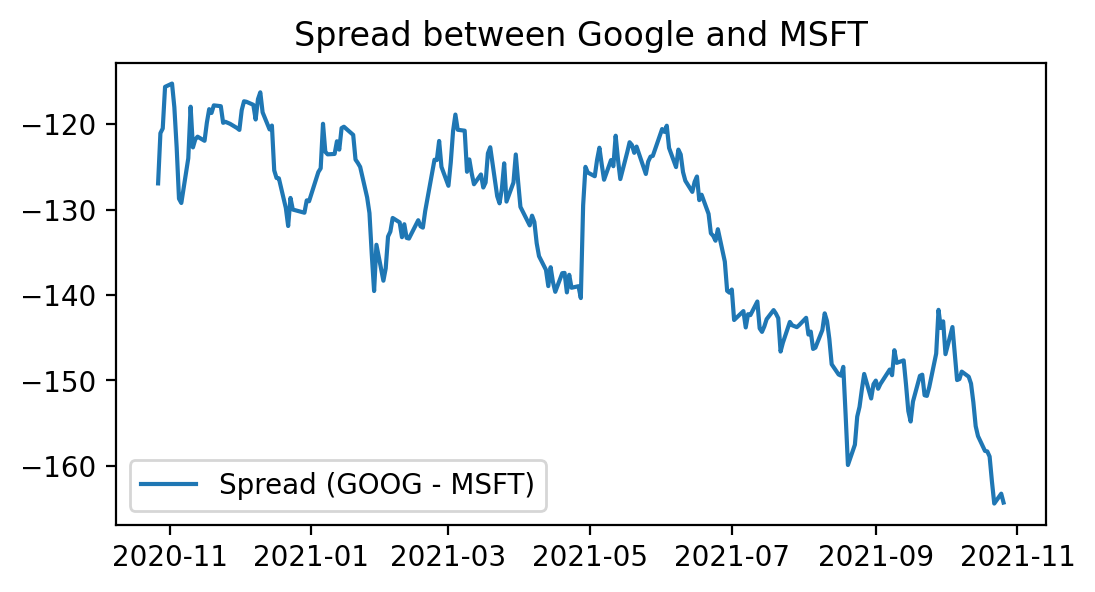

In [23]:
# Plot the spread
figure(figsize=(6, 3), dpi=200)
plt.plot(google - MSFT, label = 'Spread (GOOG - MSFT)')
plt.legend()
plt.title("Spread between Google and MSFT")

In [17]:
# Calculate cointegration
import statsmodels.tsa.stattools as ts
coin = ts.coint(google, MSFT)
print(coin)

(-2.659104503840358, 0.2146305613723799, array([-3.94060523, -3.36058133, -3.06139039]))


In [19]:
# Technique to find possible correlation in a time series object
# Finds out whether spread between 2 assets is constant over time 
coin_stat = coin[0]
p_val = coin[1]
critical_values = coin[2]
print('If cointegration exists, p_val < 0.5')
print('P val for this test is', p_val)

If cointegration exists, p_val < 0.5
P val for this test is 0.2146305613723799


Text(0.5, 1.0, 'Price Ratio between Google and Microsoft')

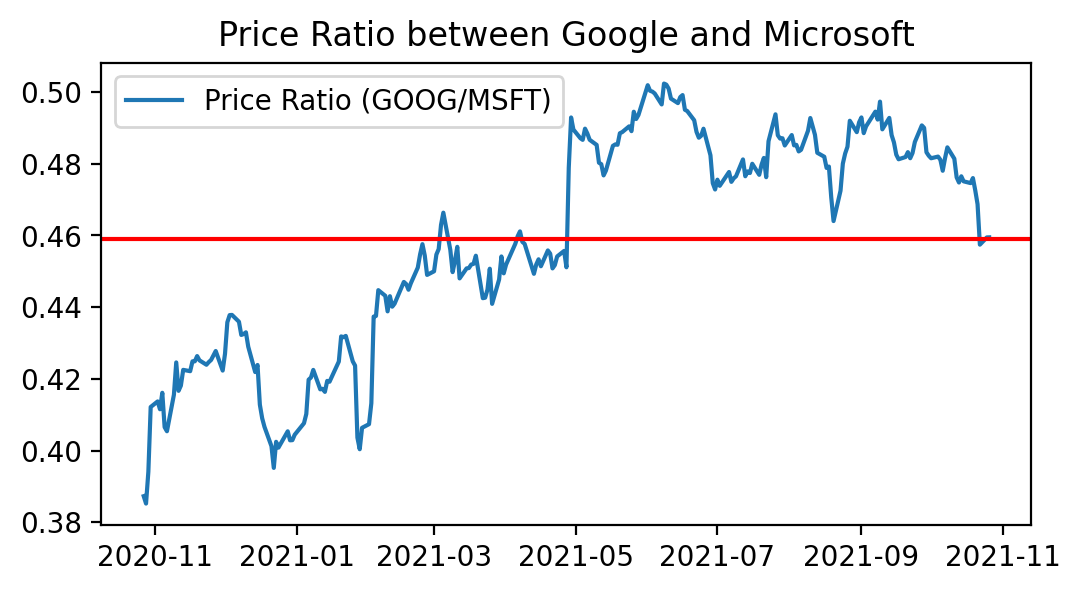

In [20]:
# Examining price ratios between the 2 assets
figure(figsize=(6,3), dpi=200)
ratio = google/MSFT
plt.plot(ratio, label='Price Ratio (GOOG/MSFT)')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title('Price Ratio between Google and Microsoft')